In [1]:
import torchfile

data = torchfile.load('example_captions.t7')

In [2]:
data

{b'raw_txt': [b'this bird has a bright yellow body, with red on its crown and wings.',
  b'this bird has a red breast and belly as well as a small bill.',
  b'small, roundish bird with off white breast and belly, light brown crown, brown and black colored wings.',
  b'A white bird with a black crown and red beak',
  b'the bird has gray crown, belly and white abdomen, with black tarsus and feet',
  b'a colorful bird with a bright yellow body, a black crown and throat, orange beak, and black primaries and secondaries.',
  b'A white bird with a black crown and red beak this bird has red breast and yellow belly'],
 b'fea_txt': [array([[-0.04520281,  0.08152433,  0.24846981, ..., -0.06418797,
          -0.12716012, -0.16215473]], dtype=float32),
  array([[ 0.01993364,  0.00673996,  0.06831662, ..., -0.08569273,
          -0.00709567, -0.03015756]], dtype=float32),
  array([[ 0.01357333,  0.26799026,  0.15347357, ..., -0.20801714,
          -0.04913272, -0.10959315]], dtype=float32),
  array

In [3]:
from model import STAGE1_G as G1

In [4]:
type(data)

torchfile.hashable_uniq_dict

In [5]:
embeddings = data[b'fea_txt']

In [6]:
len(embeddings)

7

In [7]:
type(embeddings[0])
import numpy as np

In [8]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b'this bird has a bright yellow body, with red on its crown and wings.'

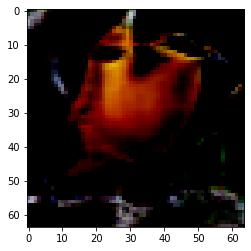

In [10]:
path_model = '../models/netG_epoch_100.pth'

generator = G1()
generator.load_state_dict(torch.load(path_model, map_location='cuda:0'))
generator.cuda()

generator.cuda()
generator.eval()

batchsize = 1
nz = 100

num_img = 0

#for i in range(len(embeddings)):
with torch.no_grad():
    for i in range(num_img, num_img+1):
        emb = embeddings[i]
        noise = Variable(torch.FloatTensor(batchsize, nz)).cuda()
        noise.data.normal_(0, 1)
        input = torch.Tensor(emb).cuda()
        _, fake_img, mu, logvar = generator(input, noise)
        #print(fake_img.shape)
        plt.imshow(fake_img[0].permute(1,2,0).cpu())
        
data[b'raw_txt'][num_img]